In [ ]:
#Decision Tree Algorithm
import math
math.log((9/14),2)

-0.6374299206152917

In [ ]:
-((9/14)*math.log((9/14),2))-((5/14)*math.log((5/14),2))

0.9402859586706309

In [ ]:
from scipy.stats import entropy

In [ ]:
entropy([9/14,5/14],base=2)

0.940285958670631

In [ ]:
entropy([3/5,2/5],base=2)

0.9709505944546688

In [ ]:
entropy([0/4,4/4],base=2)

0.0

In [ ]:
entropy([1/4,3/4],base =2)

0.8112781244591328

In [ ]:
#DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dt.csv')
df.head()

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [ ]:
df = df.drop('Day',axis=1)
df.head()

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Outlook,Temp,Humidity,Wind,Decision
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [ ]:
df.columns

Index(['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'], dtype='object')

In [ ]:
X = df[['Outlook', 'Temp', 'Humidity', 'Wind']]
y = df['Decision']

In [ ]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [ ]:
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
from sklearn.tree import export_text

In [ ]:
result = export_text(dt,feature_names=['Outlook', 'Temp', 'Humidity', 'Wind'])

In [ ]:
print(result)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



In [ ]:
from sklearn import tree

[Text(0.375, 0.9, 'x[0] <= 0.5\nentropy = 0.89\nsamples = 13\nvalue = [4, 9]'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.5, 'x[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

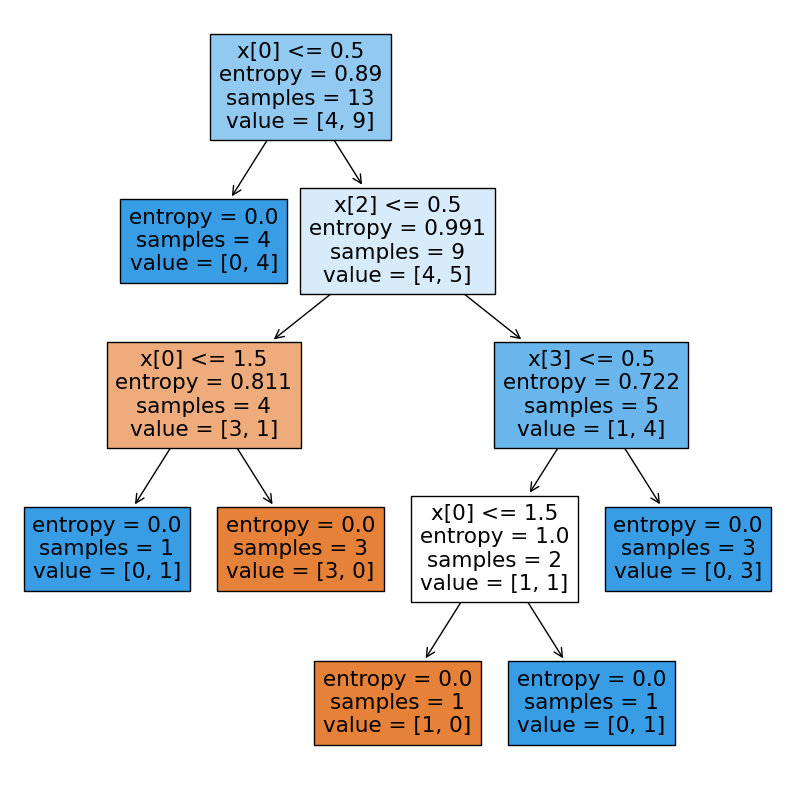

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dt,filled=True,ax=ax)

In [ ]:
dt.score(X,y)

1.0